In [1]:
import psycopg2
import numpy as np
import matplotlib.pyplot as plt

try:
    print("\033[95mconnection to database...")
    conn = psycopg2.connect(
        database='piscineds',
        user='bgales',
        password='mysecretpassword',
        host='localhost'
    )
    table_name = 'customers'
    cursor = conn.cursor()
    print('\033[92mconnection with database OK')
    cursor.execute('BEGIN;')

except Exception as e:
    print("\033[91mError: ", e)
    print('\033[93mrollback in progress...\033[0m')
    conn.rollback()

connection to database...
connection with database OK


In [2]:
try:
    print('\033[93mfetching data from database...')
    cursor.execute(
        f'''
            SELECT COUNT(event_type), event_type as result FROM {table_name}
            GROUP BY event_type
            ORDER BY result DESC
        '''
    )
    print('\033[92mdata fetched with success!')
except Exception as e:
    print("\033[91mError: ", e)
    print('\033[93mrollback in progress...\033[0m')
    conn.rollback()

fetching data from database...
data fetched with success!


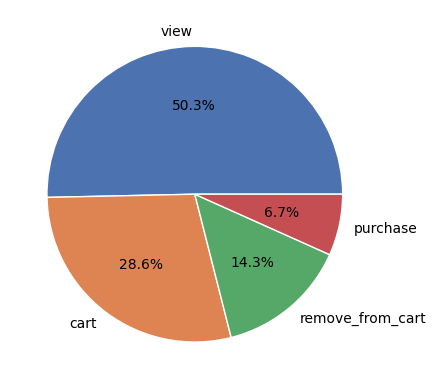

closing connection with database...


In [3]:
fetch_data = np.array(cursor.fetchall())
fetch_data= fetch_data[[0, 3, 1, 2]]
label = []
y = np.array([])
for count, event_type in fetch_data :
    y = np.append(y, count)
    label.append(event_type)
plt.pie(y, labels=[event_type for _, event_type in fetch_data],
        autopct='%1.1f%%', wedgeprops={'edgecolor': 'white'},
        colors=['#4C72B0', '#DD8452', '#55A868', '#C44E52']
        )
plt.show()

if conn:
    print("\033[95mclosing connection with database...")
    cursor.close()
    conn.close()